# Modeling One 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression, ElasticNetCV, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df_2004 = pd.read_csv('./csv_files/df_2004')
df_2008 = pd.read_csv('./csv_files/df_2008')
df_2012 = pd.read_csv('./csv_files/df_2012')
df_2016 = pd.read_csv('./csv_files/df_2016')

In [3]:
df_2004.head()

,oct_rate,nov_rate,density,per_pov,med_income,total_vote_ratio,dem_vote_ratio,rep_vote_ratio,vote_diff,continuum_2003,influence_2003,per_less_high_2000,per_high_diploma_2000,per_some_college_2000,per_bachelors_or_higher_2000,per_less_high_change,per_high_dimploma_change,per_some_college_change,per_bachelors_change
0,7.8,8.3,0.019365,15.1,31362,0.374462,0.167296,0.207166,-0.039870,6,6,29.9,35.9,21.4,12.8,-11.2,2.5,6.7,2.0
1,5.3,5.3,0.011065,21.0,30040,0.422471,0.150904,0.271567,-0.120663,4,5,35.3,38.0,17.2,9.4,-10.1,4.5,4.6,1.0
2,4.0,4.6,0.012538,14.9,31256,0.364665,0.151942,0.212724,-0.060782,7,9,32.1,34.1,20.3,13.5,-8.4,0.6,3.5,4.3
3,3.9,3.9,0.003150,9.1,50754,0.454130,0.173859,0.280271,-0.106412,2,2,9.2,23.1,36.5,31.2,-3.6,-2.9,0.2,6.3
4,3.5,3.7,0.070994,9.7,41406,0.526998,0.228582,0.298416,-0.069834,8,7,12.2,48.4,28.2,11.2,-10.3,3.0,6.0,1.4


# Linear Modeling

In [4]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def linear_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    print('R^2', lm.score(X_test, y_test))
    
    predictions = lm.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test - lm.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
    columns = []
    for x in X.columns:
        columns.append(x + '[{}]' .format(target))
    
    feature_importance = pd.DataFrame()
    feature_importance['feature_name'] = columns
    feature_importance['coefficients'] = lm.coef_

    
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-0.6, 0.6)

    people = feature_importance['feature_name']
    y_pos = np.arange(len(people))
    performance = feature_importance['coefficients']


    ax.barh(y_pos, performance, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis() 
    plt.show()

# 2004

/Users/Penelope/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


R^2 0.521837485354
mean squared error 0.0554586520087


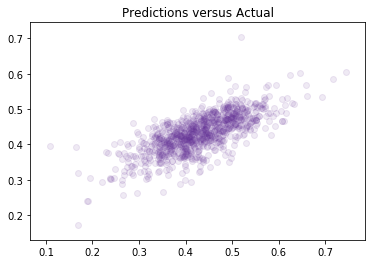

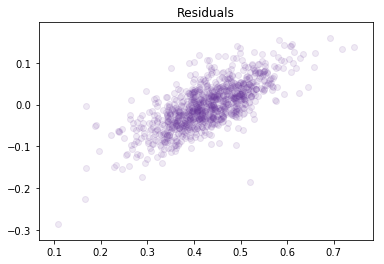

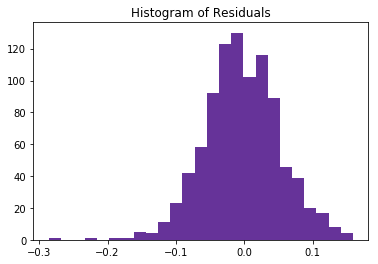

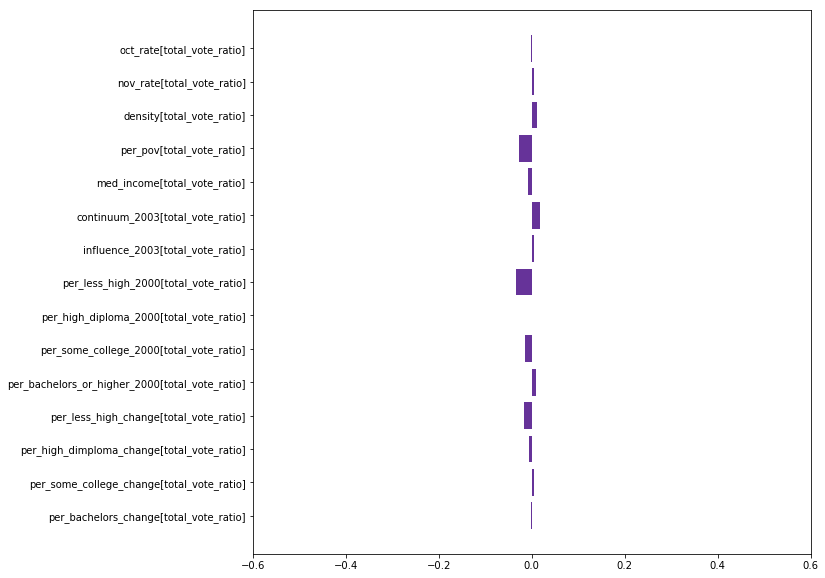

In [5]:
linear_model(df_2004, 'total_vote_ratio')

R^2 0.245327397713
mean squared error 0.0562970607309


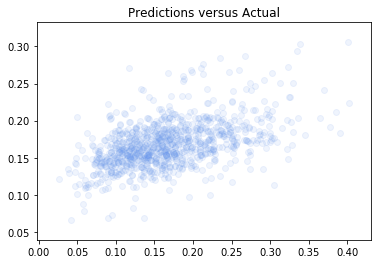

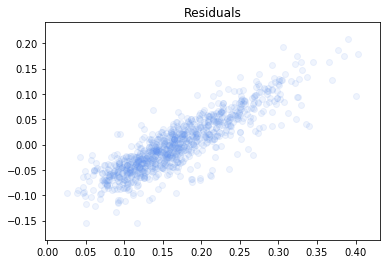

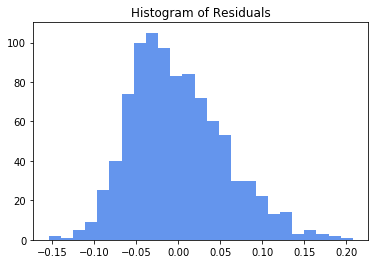

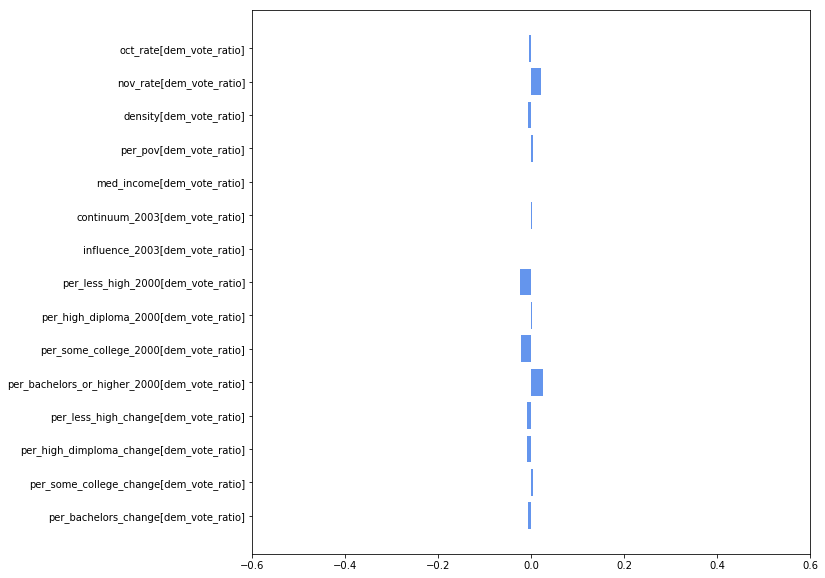

In [6]:
linear_model(df_2004, 'dem_vote_ratio')

R^2 0.560321120784
mean squared error 0.0497455714277


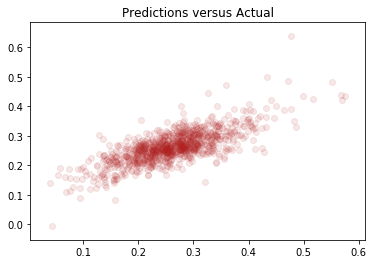

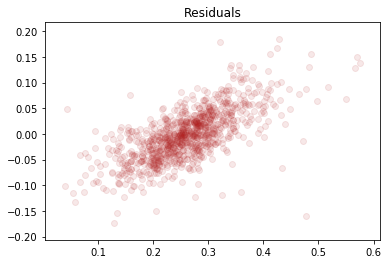

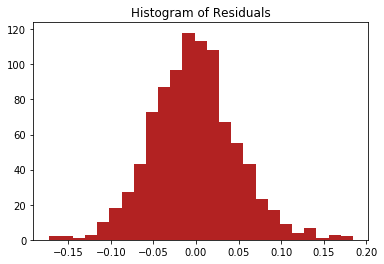

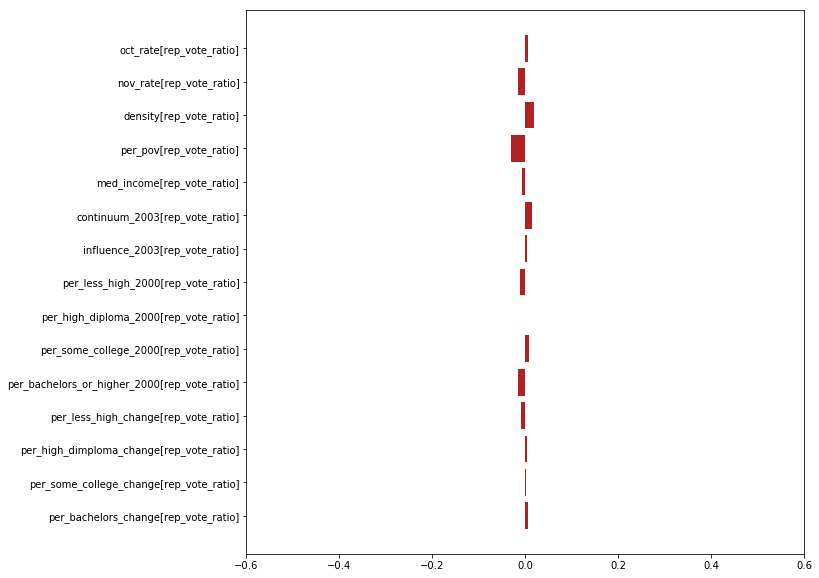

In [7]:
linear_model(df_2004, 'rep_vote_ratio')

R^2 0.378963557361
mean squared error 0.0906217400219


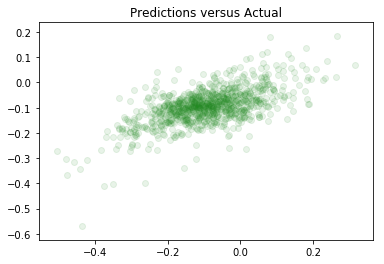

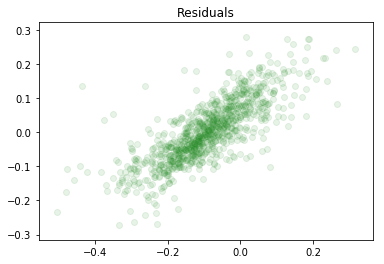

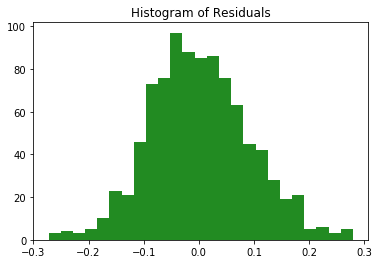

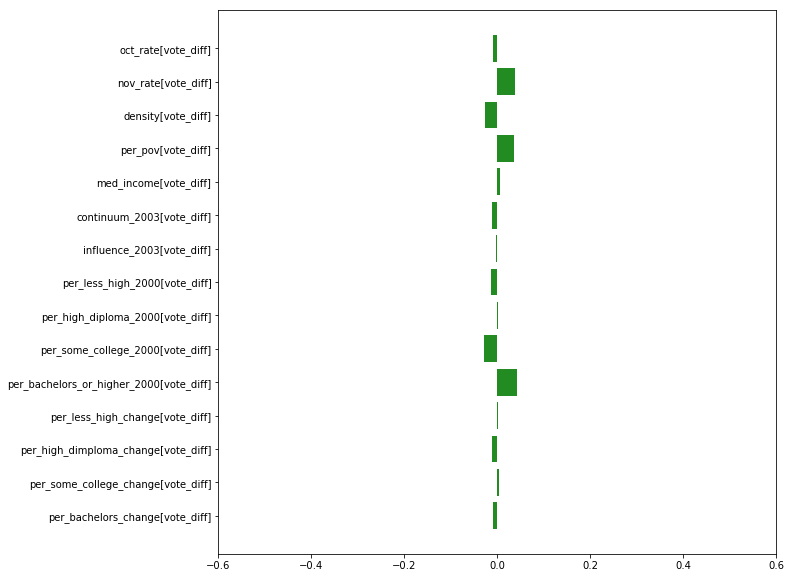

In [8]:
linear_model(df_2004, 'vote_diff')

# 2008

R^2 0.498994335857
mean squared error 0.0563080012867


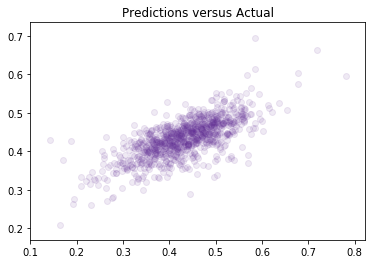

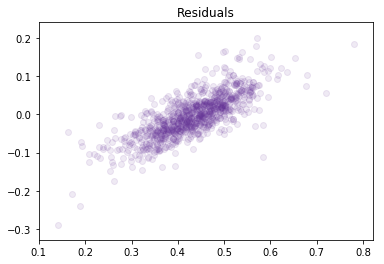

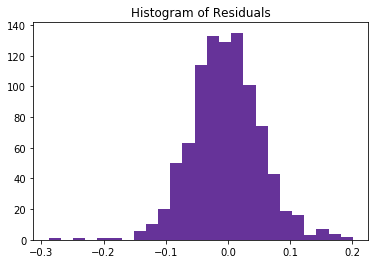

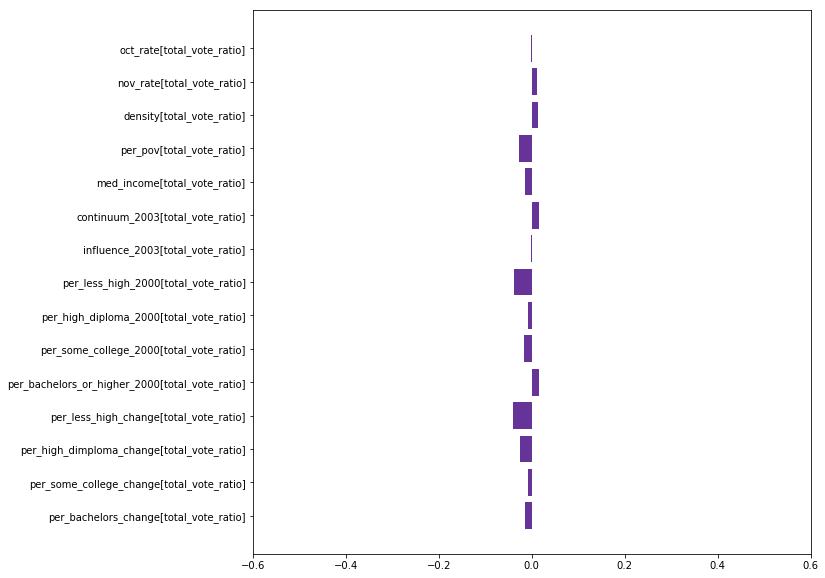

In [9]:
linear_model(df_2008, 'total_vote_ratio')

R^2 0.315225212409
mean squared error 0.0614572031667


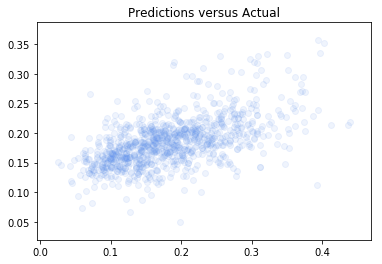

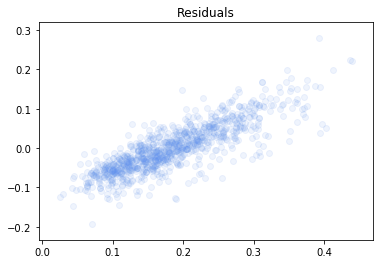

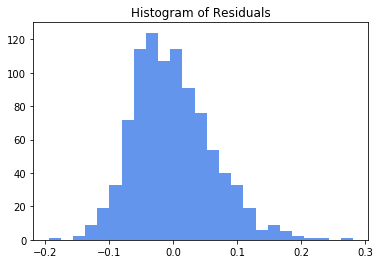

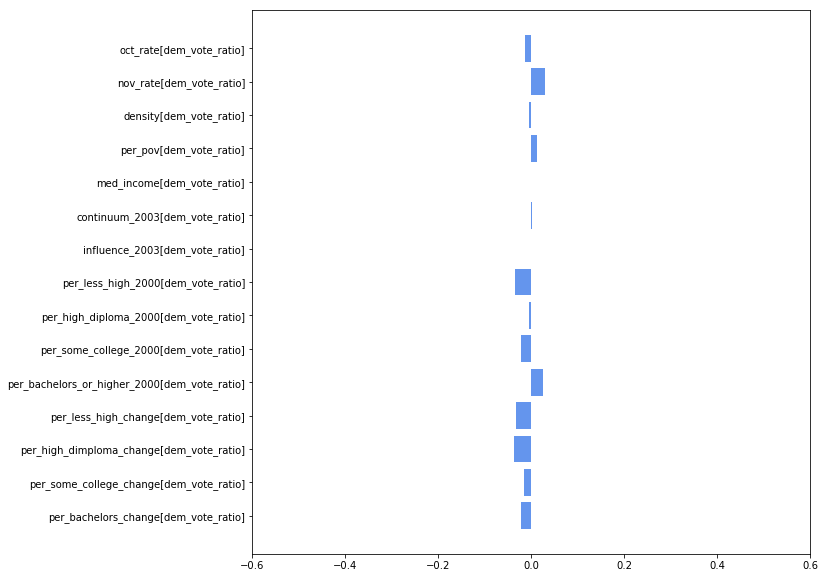

In [10]:
linear_model(df_2008, 'dem_vote_ratio')

R^2 0.475454042076
mean squared error 0.0520534335405


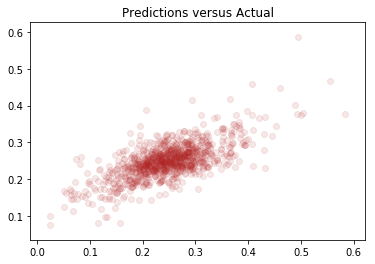

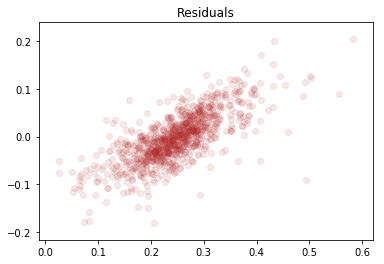

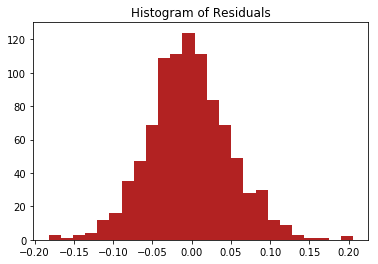

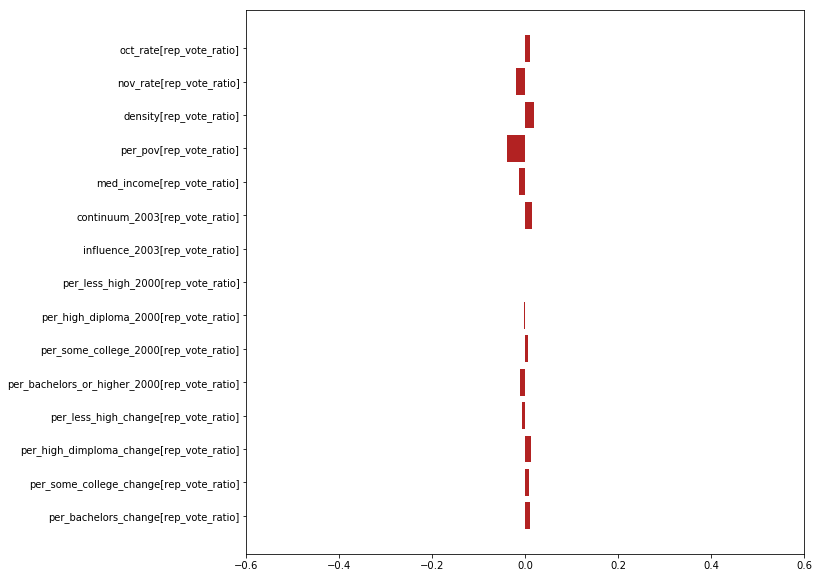

In [11]:
linear_model(df_2008, 'rep_vote_ratio')

R^2 0.347975142079
mean squared error 0.0990075982941


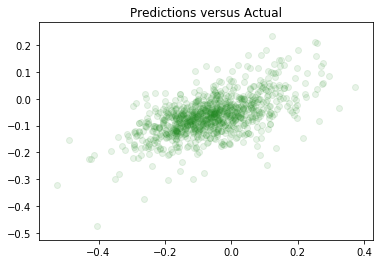

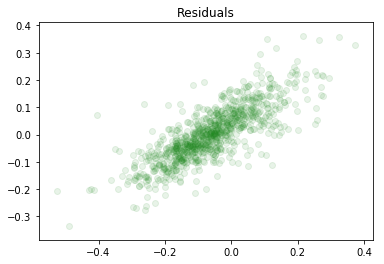

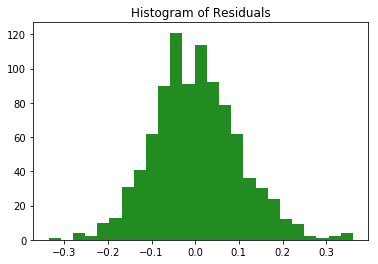

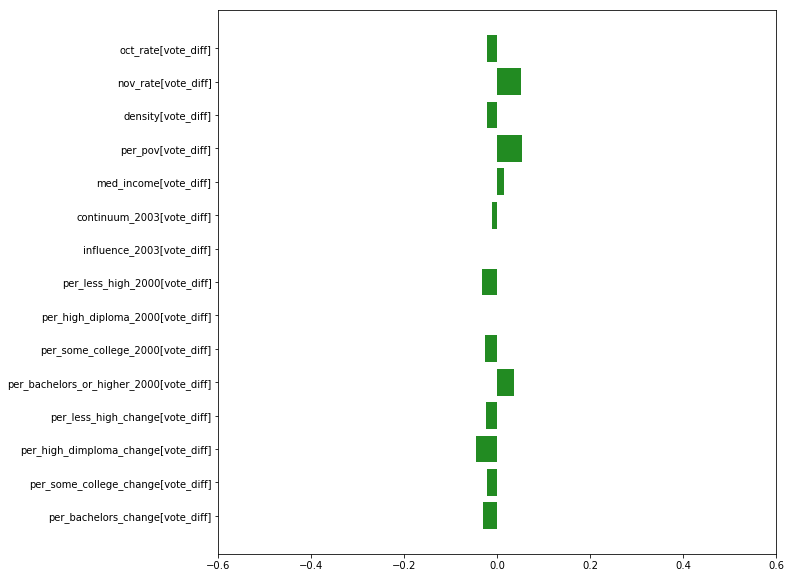

In [12]:
linear_model(df_2008, 'vote_diff')

# 2012

R^2 0.418150081375
mean squared error 0.064506003354


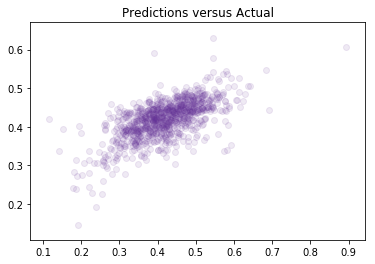

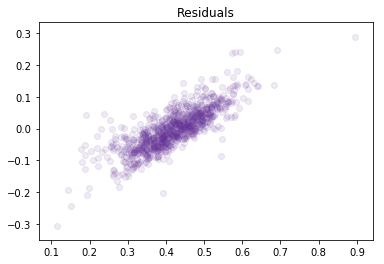

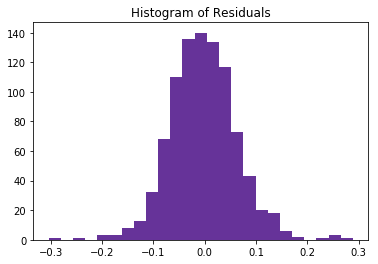

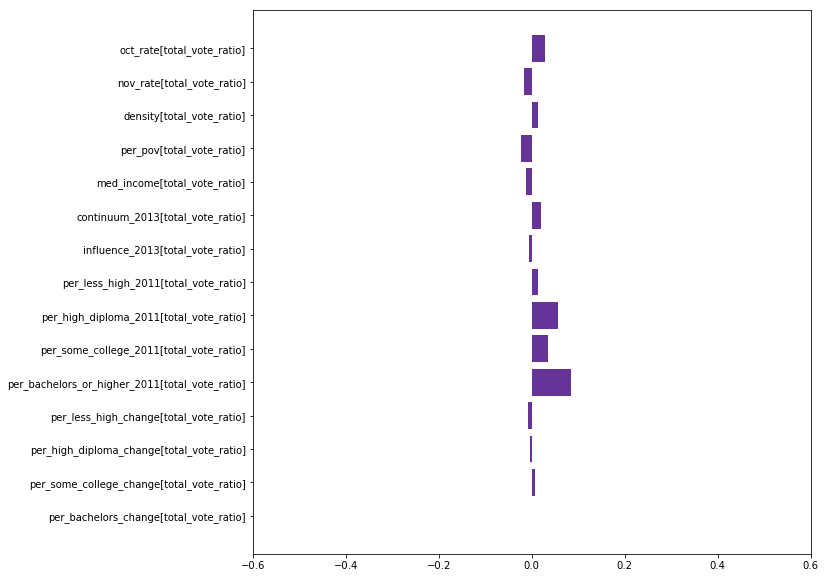

In [13]:
linear_model(df_2012, 'total_vote_ratio')

R^2 0.273589892641
mean squared error 0.0653423976474


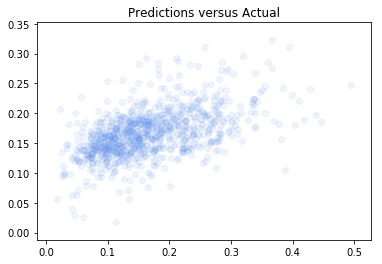

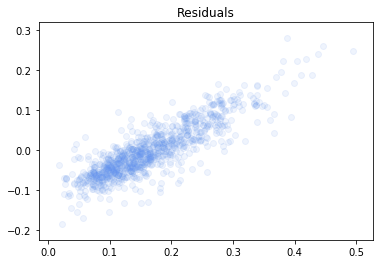

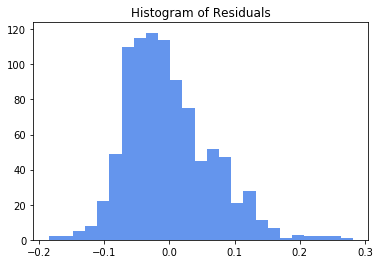

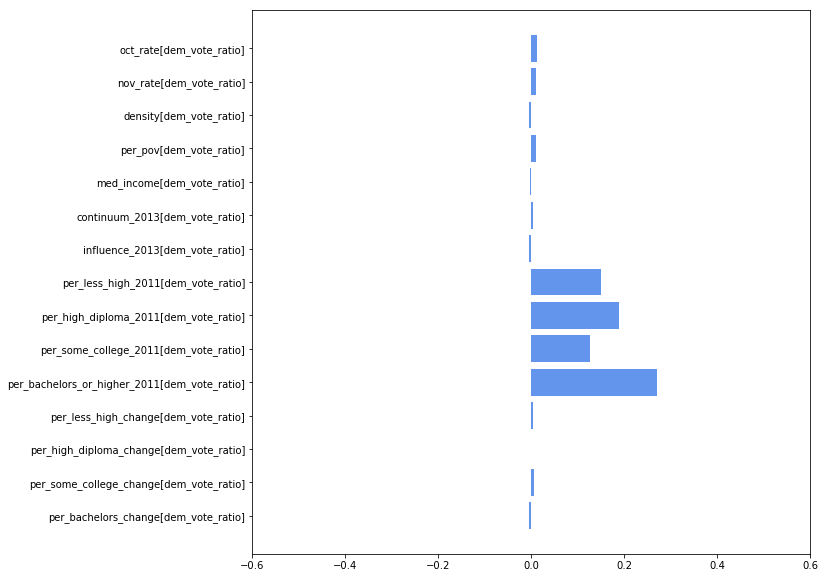

In [14]:
linear_model(df_2012, 'dem_vote_ratio')

R^2 0.48511719465
mean squared error 0.0554562288885


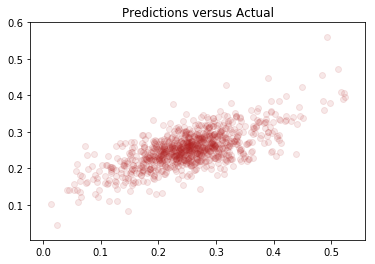

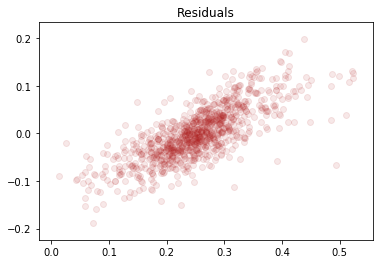

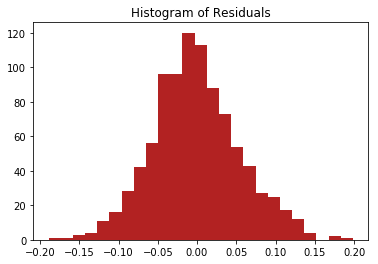

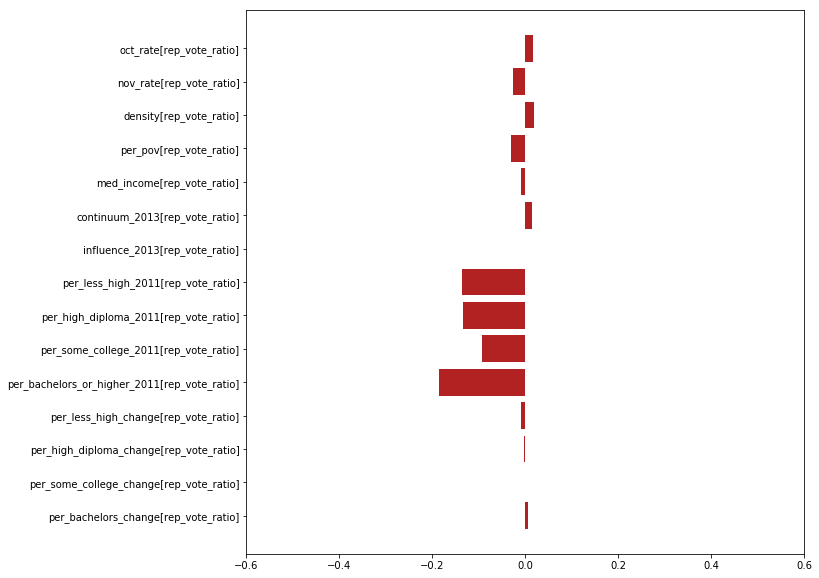

In [15]:
linear_model(df_2012, 'rep_vote_ratio')

R^2 0.363807183968
mean squared error 0.102611013234


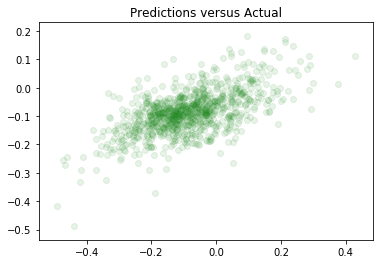

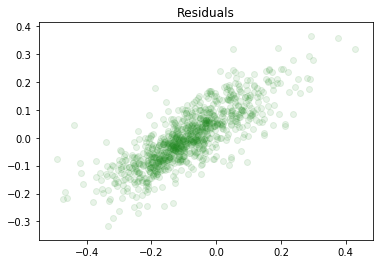

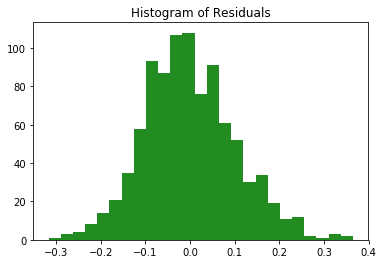

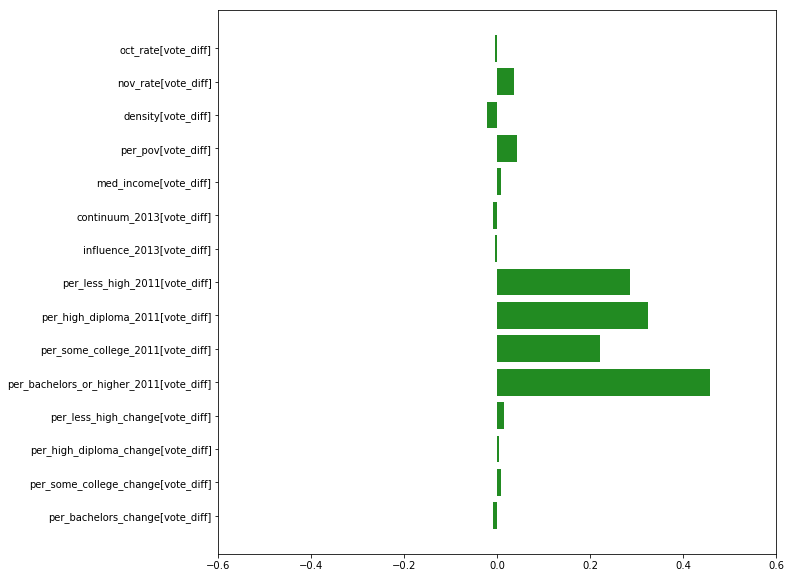

In [16]:
linear_model(df_2012, 'vote_diff')

# 2016

R^2 0.411979981986
mean squared error 0.0610019367211


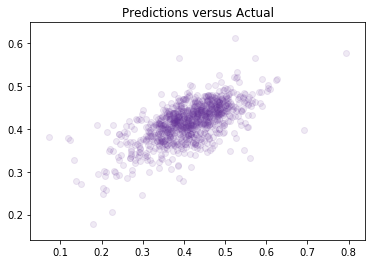

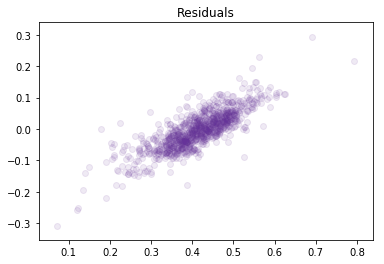

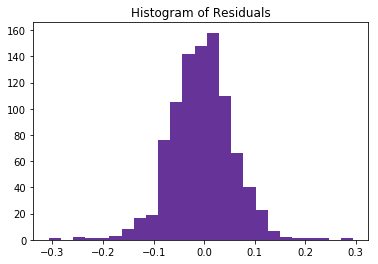

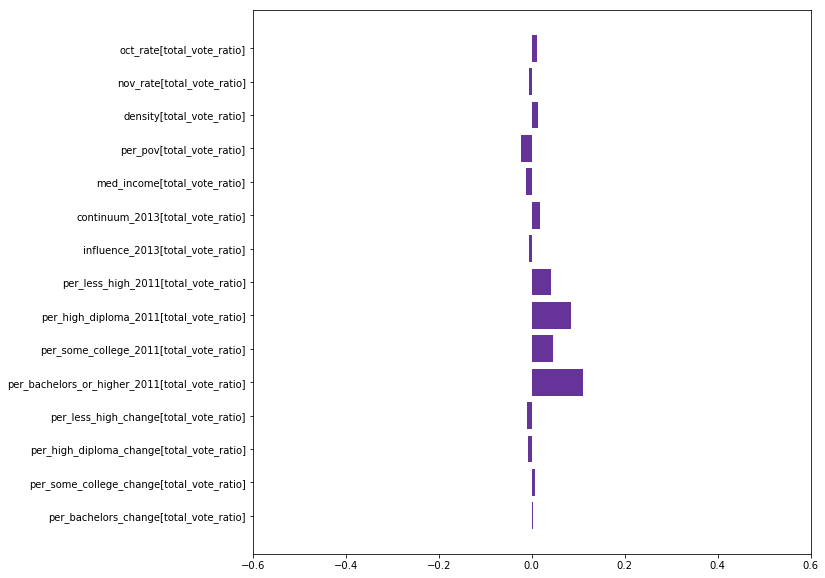

In [17]:
linear_model(df_2016, 'total_vote_ratio')

R^2 0.400547028068
mean squared error 0.0553044996053


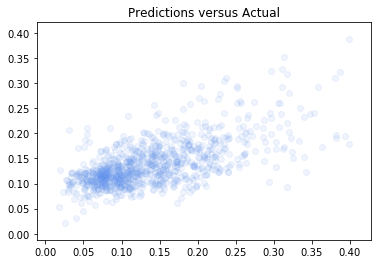

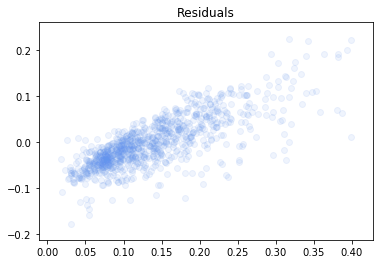

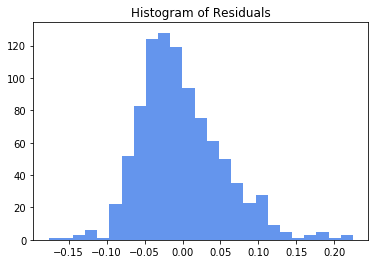

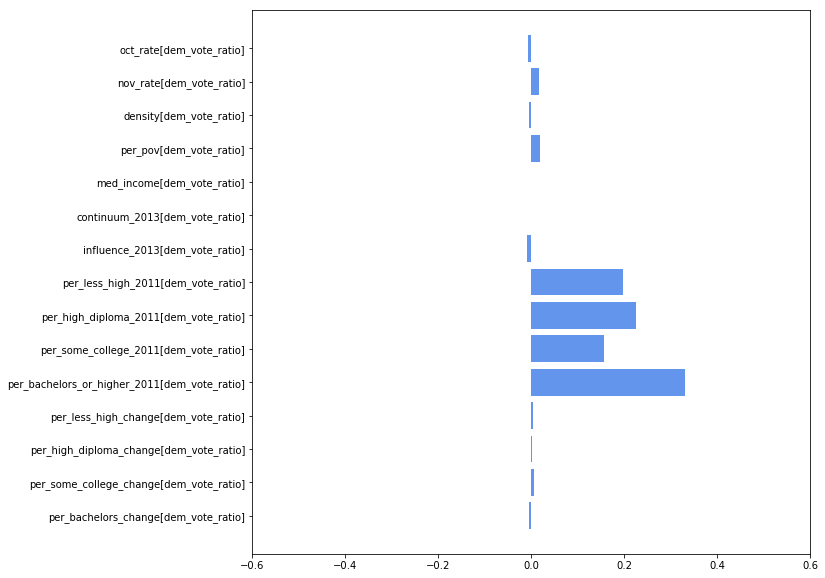

In [18]:
linear_model(df_2016, 'dem_vote_ratio')

R^2 0.564445172807
mean squared error 0.0564279764372


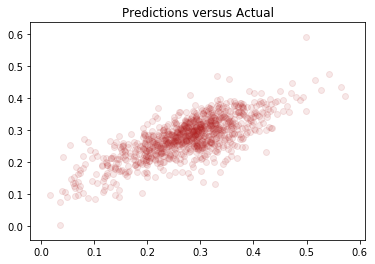

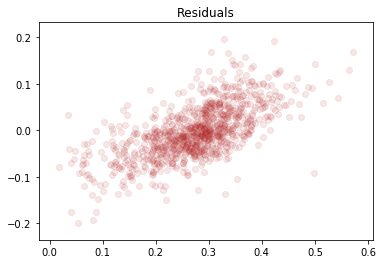

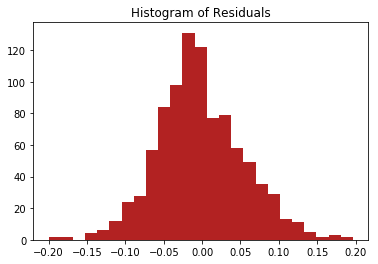

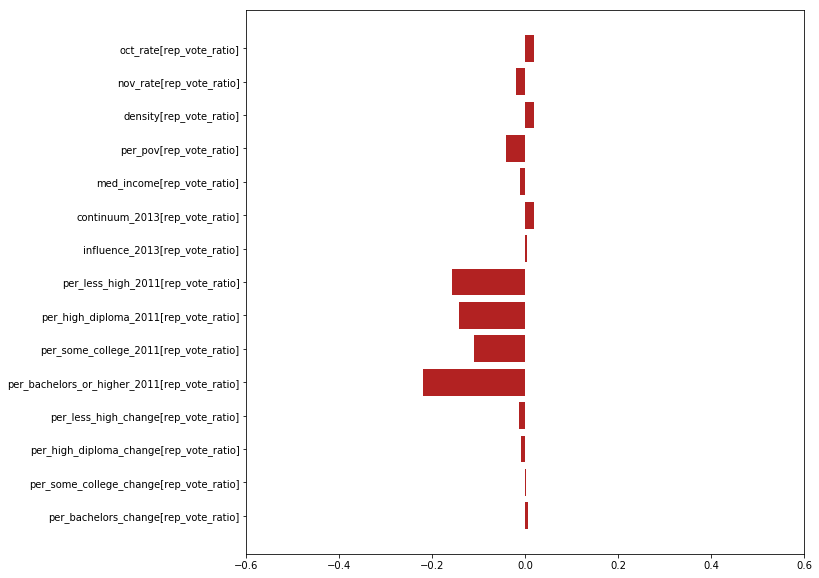

In [19]:
linear_model(df_2016, 'rep_vote_ratio')

R^2 0.526187869091
mean squared error 0.0936171571831


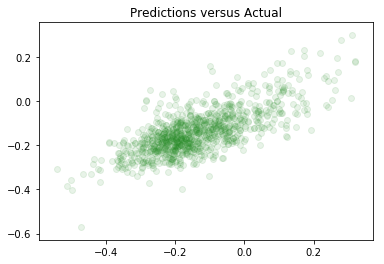

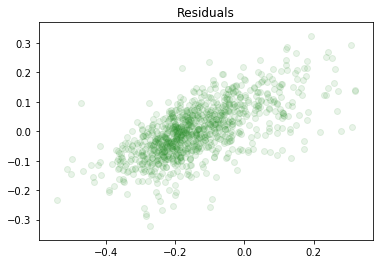

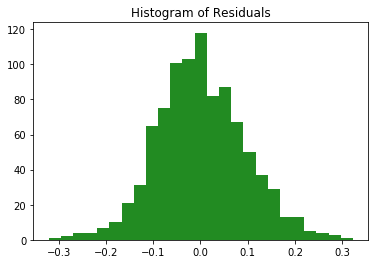

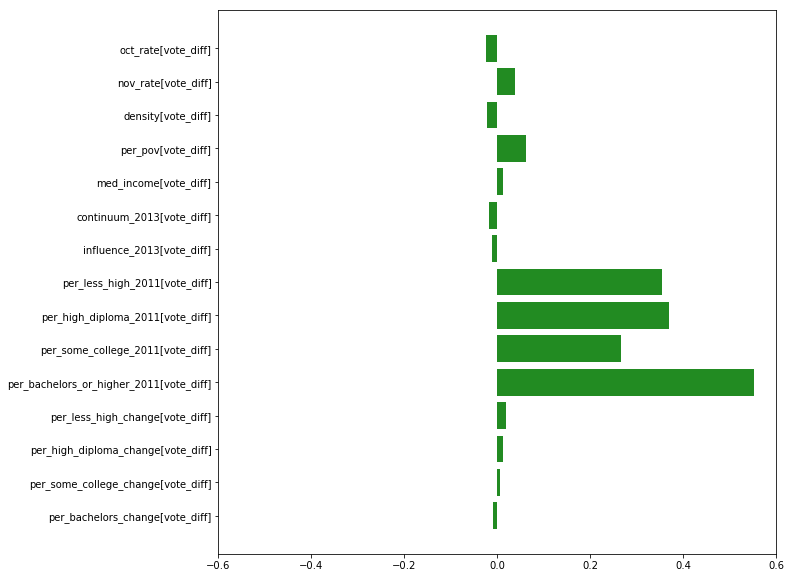

In [20]:
linear_model(df_2016, 'vote_diff')

# Decision Trees

In [21]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def tree_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    tree = DecisionTreeRegressor(max_depth=7)
    tree.fit(X_train, y_train)
    
    print('R^2', tree.score(X_test, y_test))
    
    predictions = tree.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test - tree.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
    columns = []
    for x in X.columns:
        columns.append(x + '[{}]' .format(target))
    
    feature_importance = pd.DataFrame()
    feature_importance['feature_name'] = columns
    feature_importance['coefficients'] = tree.feature_importances_
    
        
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    plt.xlim(-0.6, 0.6)

    people = feature_importance['feature_name']
    y_pos = np.arange(len(people))
    performance = feature_importance['coefficients']


    ax.barh(y_pos, performance, align='center', color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(people)
    ax.invert_yaxis() 
    plt.show()

R^2 0.35437685863
mean squared error 0.0644423085858


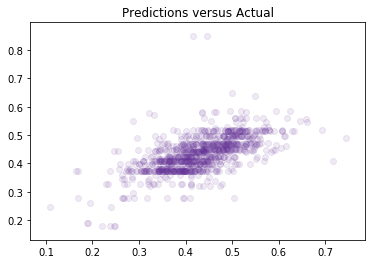

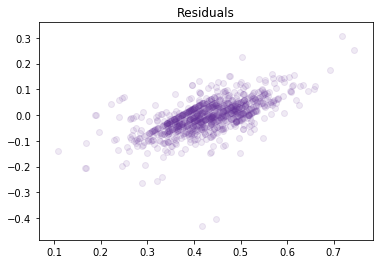

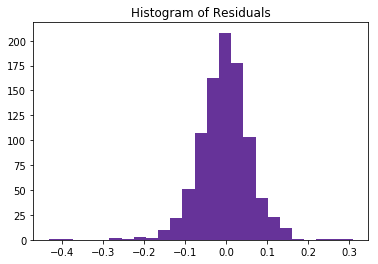

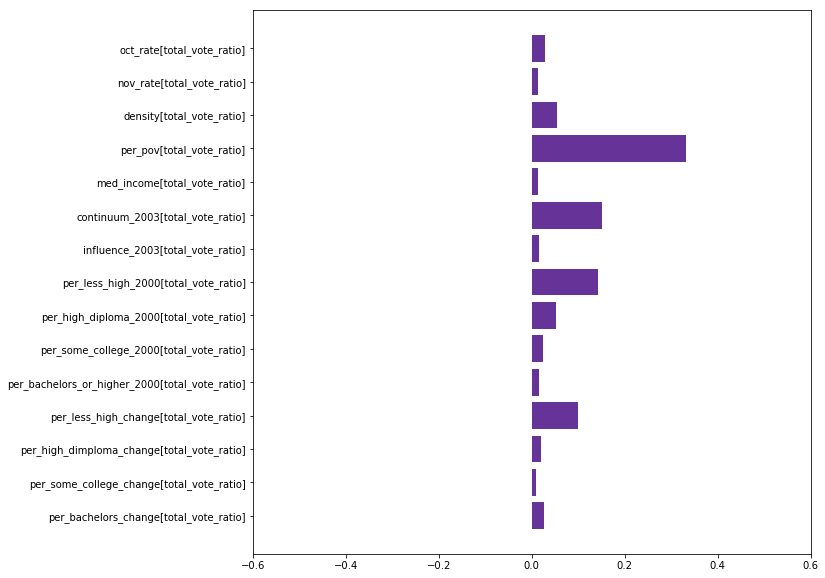

In [22]:
tree_model(df_2004, 'total_vote_ratio')

R^2 0.169691233264
mean squared error 0.0590508618892


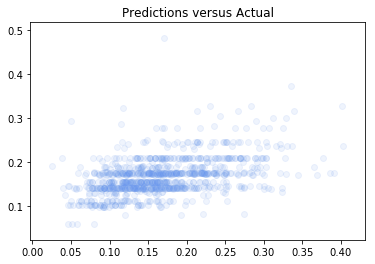

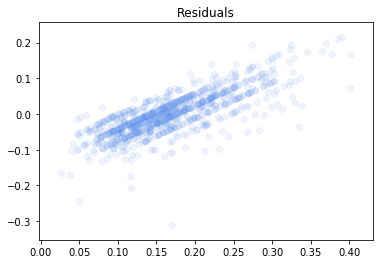

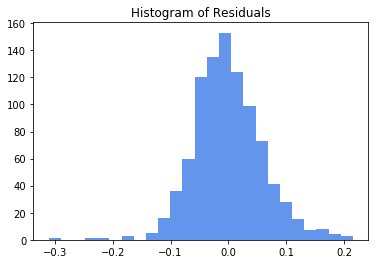

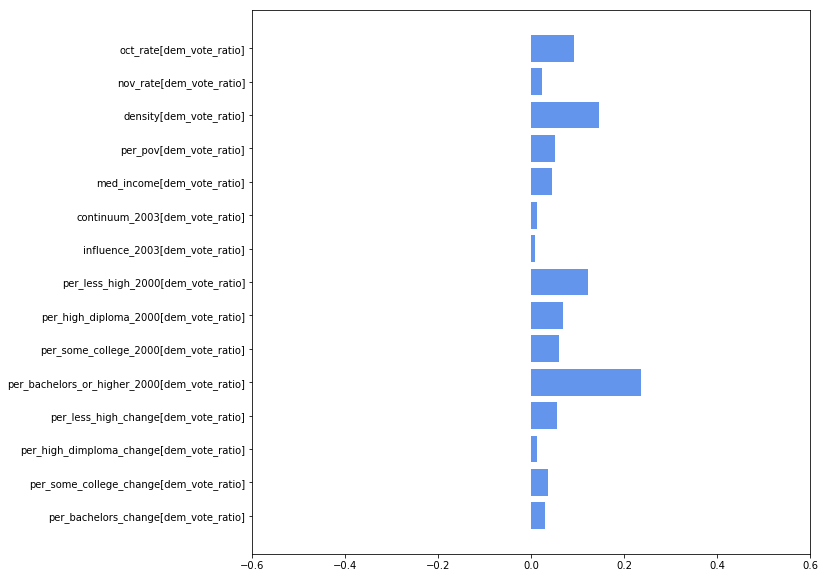

In [23]:
tree_model(df_2004, 'dem_vote_ratio')

R^2 0.494118438591
mean squared error 0.0533594134712


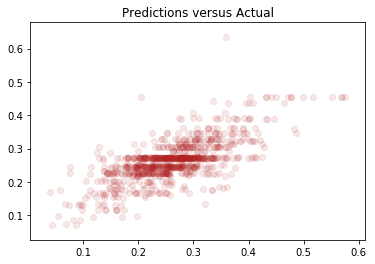

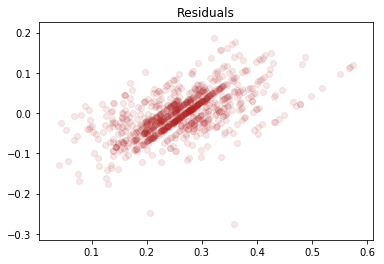

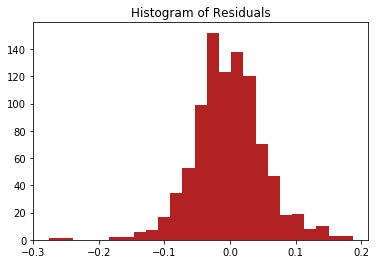

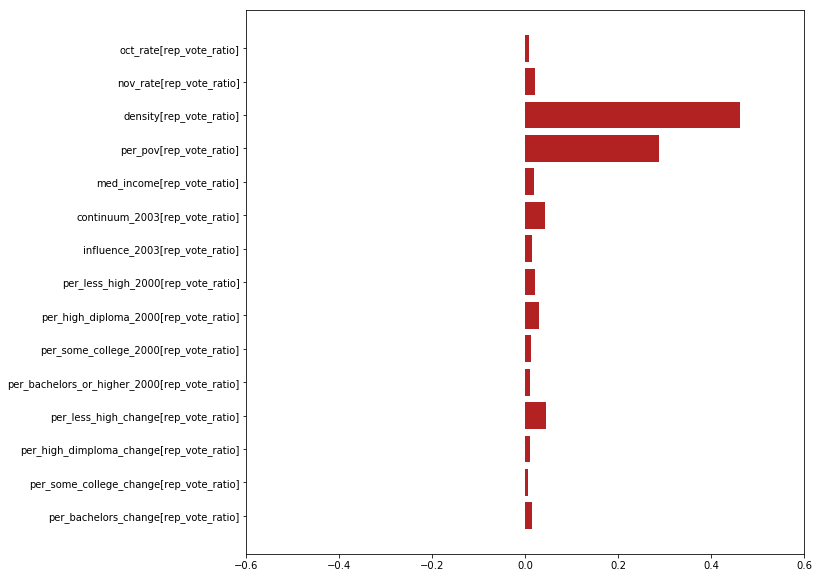

In [24]:
tree_model(df_2004, 'rep_vote_ratio')

R^2 0.331534299431
mean squared error 0.0940185216734


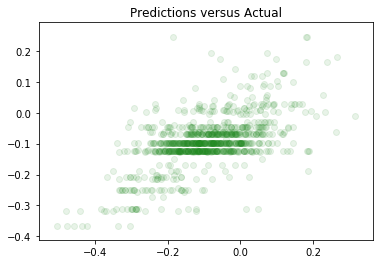

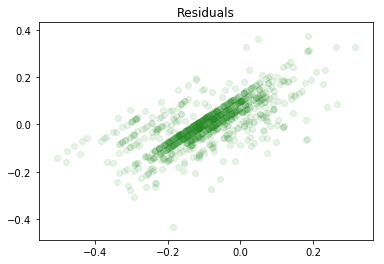

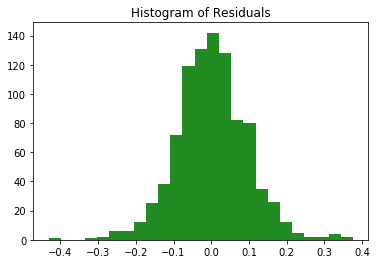

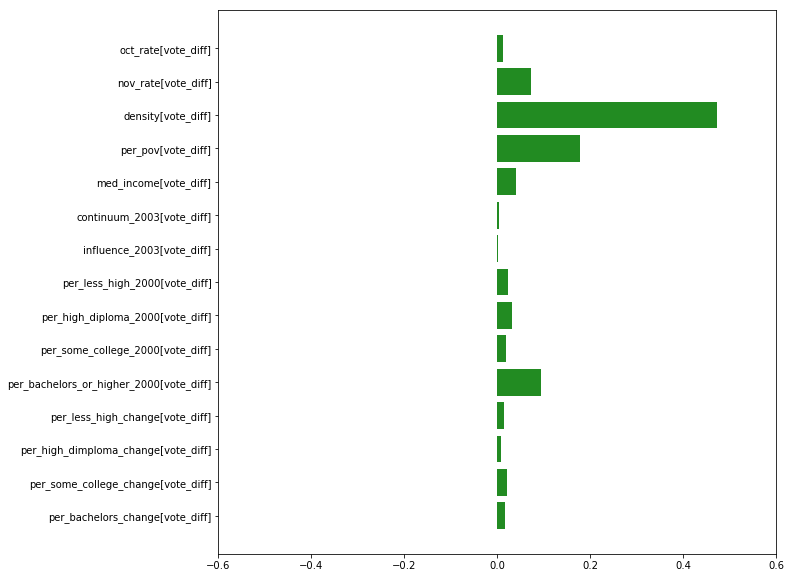

In [25]:
tree_model(df_2004, 'vote_diff')

R^2 0.437475519434
mean squared error 0.059664981129


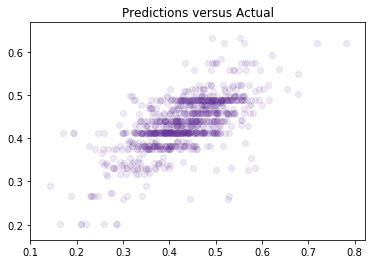

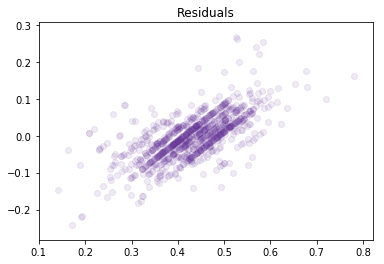

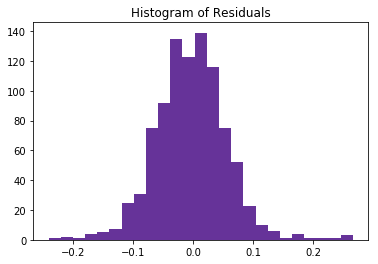

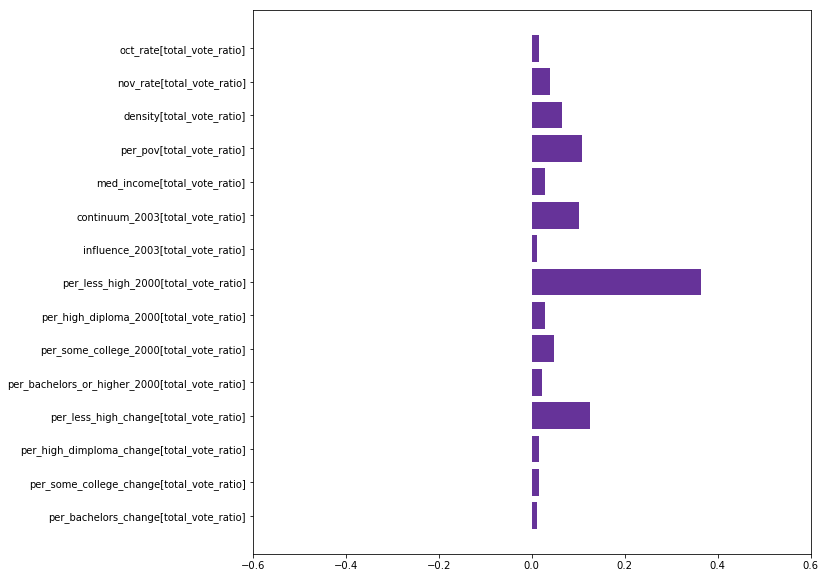

In [26]:
tree_model(df_2008, 'total_vote_ratio')

R^2 0.231291366273
mean squared error 0.0651148119578


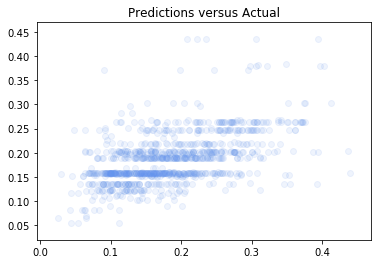

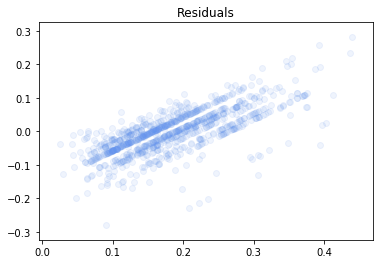

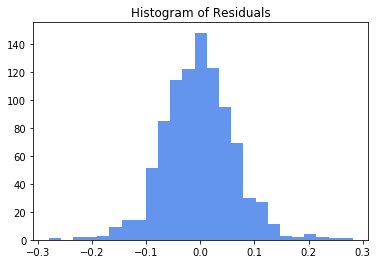

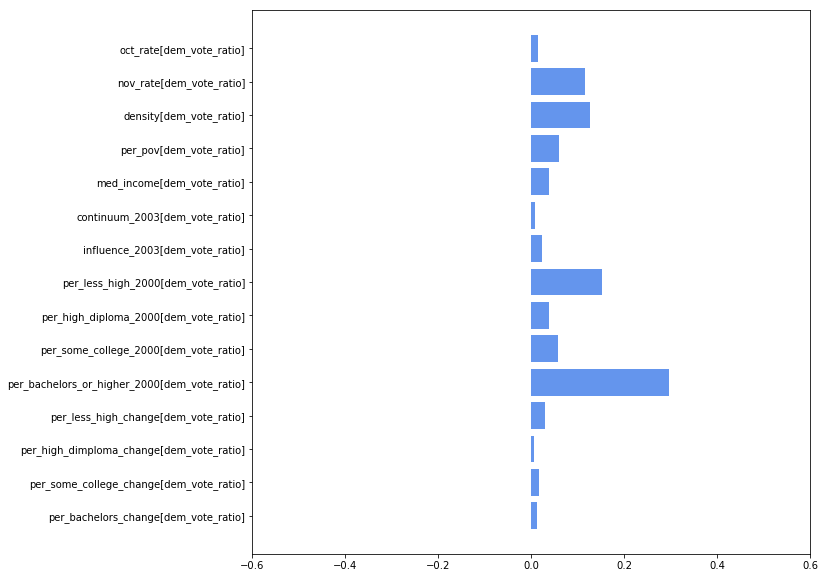

In [27]:
tree_model(df_2008, 'dem_vote_ratio')

R^2 0.446208130989
mean squared error 0.0534848641148


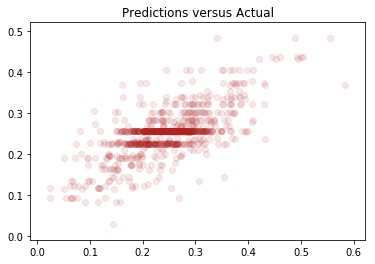

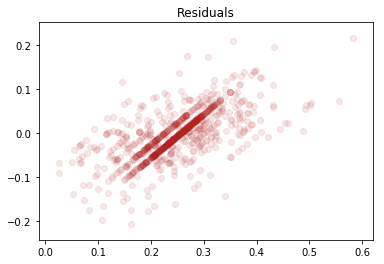

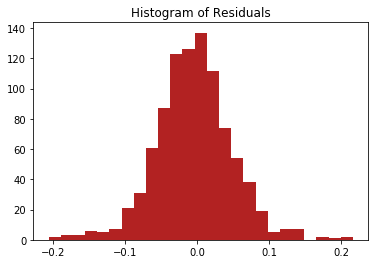

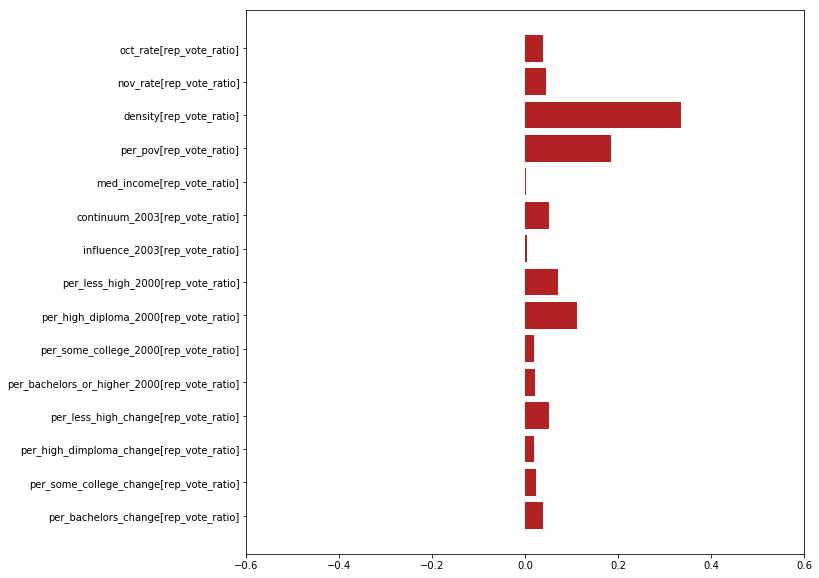

In [28]:
tree_model(df_2008, 'rep_vote_ratio')

# Lasso

In [29]:
# possible targets ['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff']
def en_model(df, target):
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    en = ElasticNetCV()
    en.fit(X_train, y_train)
    
    print('R^2', en.score(X_test, y_test))
    
    predictions = en.predict(X_test)
    
    print('mean squared error', np.sqrt(mean_squared_error(y_test, predictions)))
    
    if target == 'total_vote_ratio':
        color = 'rebeccapurple'
    elif target == 'dem_vote_ratio':
        color = 'cornflowerblue'
    elif target == 'rep_vote_ratio':
        color = 'firebrick'
    else:
        color = 'forestgreen'
    
    plt.scatter(y_test, predictions, alpha=.1, color=color)
    plt.title('Predictions versus Actual');
    plt.show()
    
    residuals = y_test.mean() - en.predict(X_test)
    
    plt.scatter(y_test, residuals, alpha=.1, color=color)
    plt.title('Residuals');
    plt.show()
    
    plt.hist(residuals, bins=25, color=color)
    plt.title("Histogram of Residuals");
    
#     columns = []
#     for x in X.columns:
#         columns.append(x + '[{}]' .format(target))
    
#     feature_importance = pd.DataFrame()
#     feature_importance['feature_name'] = columns
#     feature_importance['coefficients'] = lasso.feature_importances_
    
#     return feature_importance

R^2 0.492890205954
mean squared error 0.0566499842071


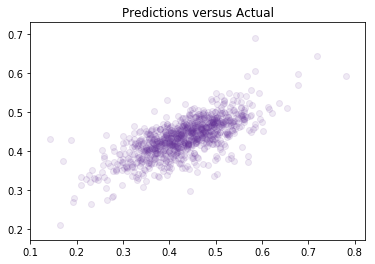

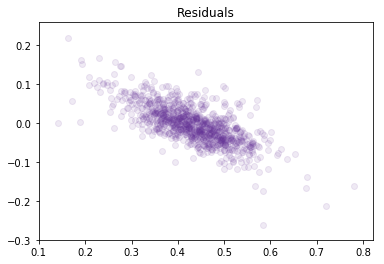

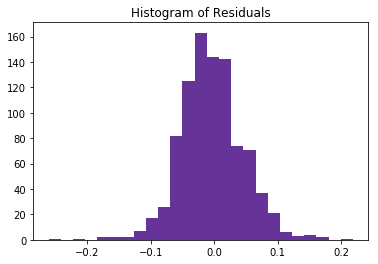

In [31]:
en_model(df_2008, 'total_vote_ratio')

R^2 0.492890205954
mean squared error 0.0566499842071


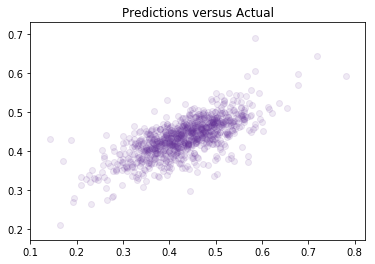

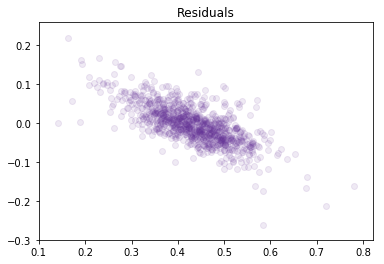

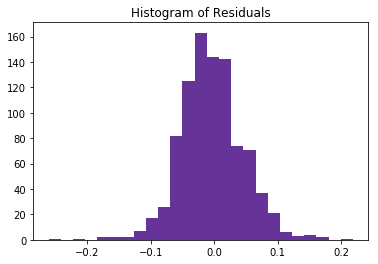

In [32]:
en_model(df_2008, 'total_vote_ratio')

R^2 0.418380183126
mean squared error 0.0644932471332


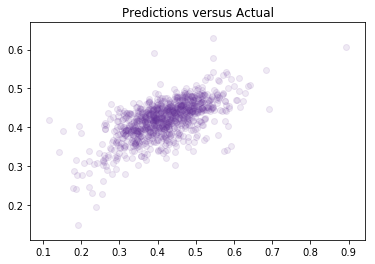

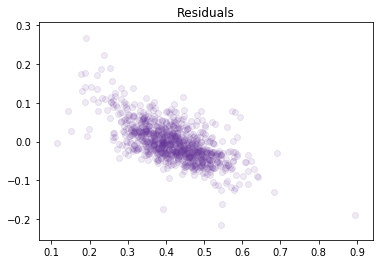

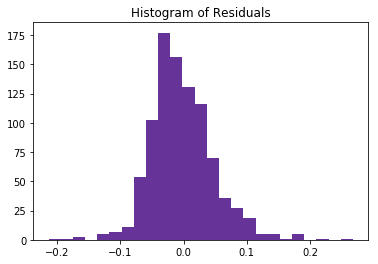

In [33]:
en_model(df_2012, 'total_vote_ratio')

R^2 0.41213602674
mean squared error 0.0609938420445


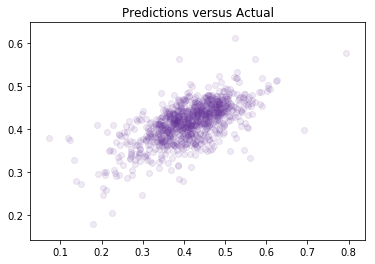

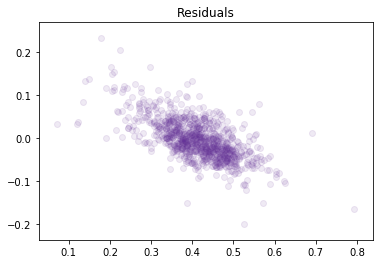

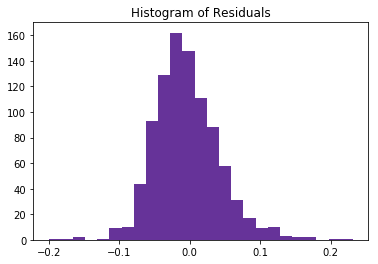

In [34]:
en_model(df_2016, 'total_vote_ratio')

# Gradient Boost

In [218]:
def grad_boost(df, target):
   
    X = df.drop(['total_vote_ratio', 'dem_vote_ratio', 'rep_vote_ratio', 'vote_diff'], axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    
    grad = GradientBoostingRegressor()
    
    grad_params = {
        'loss': ['ls'],
        'learning_rate': [.01, .1],
        'n_estimators': range(5, 200, 50),
        'max_features': range(1, 200, 50),
        'max_depth': range(1, 10, 2)
    }
    
    grad_model = GridSearchCV(grad, param_grid = grad_params, n_jobs=-1, verbose=2)
    grad_model.fit(X_train, y_train)
    
    print('best score', grad_model.best_score_)
    print('best params', grad_model.best_params_)
    print('test score', grad_model.score(X_test, y_test)) 
    
    return (grad_model.best_params_)

In [219]:
params = grad_boost(df_2008, 'total_vote_ratio')

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5 
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5 
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5 
[CV]  learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5, total=   0.0s
[CV]  learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=55 
[CV]  learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=5, total=   0.0s
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=55 
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=55 
[CV] learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=105 
[CV]  learning_rate=0.01, loss=ls, max_depth=1, max_features=1, n_estimators=55, total=   0.1s
[C

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10a9d0ae0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Penelope/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Penel.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10a9d0ae0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/Penelope/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/Penel.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = grad_boost(df_2008, 'total_vote_ratio')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 8, 18, 38, 40, 617833, tzinfo=datetime.timezone.utc), 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'session': 'D23D9777F443444685AF4725E8E4E25D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'D23D9777F443444685AF4725E8E4E25D']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "params = grad_boost(df_2008, 'total_vote_ratio')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 8, 18, 38, 40, 617833, tzinfo=datetime.timezone.utc), 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'session': 'D23D9777F443444685AF4725E8E4E25D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'D23D9777F443444685AF4725E8E4E25D'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = grad_boost(df_2008, 'total_vote_ratio')", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 12, 8, 18, 38, 40, 617833, tzinfo=datetime.timezone.utc), 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'session': 'D23D9777F443444685AF4725E8E4E25D', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '939409C4D08545C7871E6F4A1DC4D7CB', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="params = grad_boost(df_2008, 'total_vote_ratio')", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "params = grad_boost(df_2008, 'total_vote_ratio')"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("params = grad_boost(df_2008, 'total_vote_ratio')",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("params = grad_boost(df_2008, 'total_vote_ratio')",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="params = grad_boost(df_2008, 'total_vote_ratio')", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>], cell_name='<ipython-input-219-45280bd991b7>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 11981da20, execution_..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x117bbbc00, file "<ipython-input-219-45280bd991b7>", line 1>
        result = <ExecutionResult object at 11981da20, execution_..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x117bbbc00, file "<ipython-input-219-45280bd991b7>", line 1>, result=<ExecutionResult object at 11981da20, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x117bbbc00, file "<ipython-input-219-45280bd991b7>", line 1>
        self.user_global_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nfrom scip...learn.metrics import mean_squared_error, r2_score', "df_2004 = pd.read_csv('./csv_files/df_2004')\ndf_...12')\ndf_2016 = pd.read_csv('./csv_files/df_2016')", 'df_2004.head()', "# possible targets ['total_vote_ratio', 'dem_vot...ients'] = lm.coef_\n\n    return feature_importance", "total_2004_coefficients = linear_model(df_2004, 'total_vote_ratio')", "dem_2004_coefficients = linear_model(df_2004, 'dem_vote_ratio')", "rep_2004_coefficients = linear_model(df_2004, 'rep_vote_ratio')", "dif_2004_coefficients = linear_model(df_2004, 'vote_diff')", "coefficient = pd.concat([total_2004_coefficients...nts], axis=0).reset_index().drop('index', axis=1)", 'fig, ax = plt.subplots()\nfig.set_size_inches(20,...yticklabels(people)\nax.invert_yaxis() \nplt.show()', "total_2008_coefficients = linear_model(df_2008, 'total_vote_ratio')", "dem_2008_coefficients = linear_model(df_2008, 'dem_vote_ratio')", "rep_2008_coefficients = linear_model(df_2008, 'rep_vote_ratio')", "dif_2008_coefficients = linear_model(df_2008, 'vote_diff')", "coefficient = pd.concat([total_2008_coefficients...nts], axis=0).reset_index().drop('index', axis=1)", 'fig, ax = plt.subplots()\nfig.set_size_inches(20,...yticklabels(people)\nax.invert_yaxis() \nplt.show()', "total_2012_coefficients = linear_model(df_2012, 'total_vote_ratio')", "dem_2012_coefficients = linear_model(df_2012, 'dem_vote_ratio')", "rep_2012_coefficients = linear_model(df_2012, 'rep_vote_ratio')", ...], 'KNeighborsRegressor': <class 'sklearn.neighbors.regression.KNeighborsRegressor'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  , 39:                                       feature_na..._bachelors_change[total_vote_ratio]      0.040977, 40:                                       feature_na..._bachelors_change[total_vote_ratio]      0.042207, 52:       oct_rate  nov_rate  land_area  total_vote_...                  3.5  

[3111 rows x 17 columns], 55:       oct_rate  nov_rate  land_area  total_vote_...  0  
3110          0  

[3111 rows x 18 columns], 56:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  , 122:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  }, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
        self.user_ns = {'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'ElasticNetCV': <class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nfrom scip...learn.metrics import mean_squared_error, r2_score', "df_2004 = pd.read_csv('./csv_files/df_2004')\ndf_...12')\ndf_2016 = pd.read_csv('./csv_files/df_2016')", 'df_2004.head()', "# possible targets ['total_vote_ratio', 'dem_vot...ients'] = lm.coef_\n\n    return feature_importance", "total_2004_coefficients = linear_model(df_2004, 'total_vote_ratio')", "dem_2004_coefficients = linear_model(df_2004, 'dem_vote_ratio')", "rep_2004_coefficients = linear_model(df_2004, 'rep_vote_ratio')", "dif_2004_coefficients = linear_model(df_2004, 'vote_diff')", "coefficient = pd.concat([total_2004_coefficients...nts], axis=0).reset_index().drop('index', axis=1)", 'fig, ax = plt.subplots()\nfig.set_size_inches(20,...yticklabels(people)\nax.invert_yaxis() \nplt.show()', "total_2008_coefficients = linear_model(df_2008, 'total_vote_ratio')", "dem_2008_coefficients = linear_model(df_2008, 'dem_vote_ratio')", "rep_2008_coefficients = linear_model(df_2008, 'rep_vote_ratio')", "dif_2008_coefficients = linear_model(df_2008, 'vote_diff')", "coefficient = pd.concat([total_2008_coefficients...nts], axis=0).reset_index().drop('index', axis=1)", 'fig, ax = plt.subplots()\nfig.set_size_inches(20,...yticklabels(people)\nax.invert_yaxis() \nplt.show()', "total_2012_coefficients = linear_model(df_2012, 'total_vote_ratio')", "dem_2012_coefficients = linear_model(df_2012, 'dem_vote_ratio')", "rep_2012_coefficients = linear_model(df_2012, 'rep_vote_ratio')", ...], 'KNeighborsRegressor': <class 'sklearn.neighbors.regression.KNeighborsRegressor'>, 'LassoCV': <class 'sklearn.linear_model.coordinate_descent.LassoCV'>, 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'Out': {3:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  , 39:                                       feature_na..._bachelors_change[total_vote_ratio]      0.040977, 40:                                       feature_na..._bachelors_change[total_vote_ratio]      0.042207, 52:       oct_rate  nov_rate  land_area  total_vote_...                  3.5  

[3111 rows x 17 columns], 55:       oct_rate  nov_rate  land_area  total_vote_...  0  
3110          0  

[3111 rows x 18 columns], 56:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  , 122:    oct_rate  nov_rate  land_area  total_vote_rat...                      6.0                   1.4  }, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/Penelope/Desktop/Capstone/Voter_Behavior/<ipython-input-219-45280bd991b7> in <module>()
----> 1 params = grad_boost(df_2008, 'total_vote_ratio')

...........................................................................
/Users/Penelope/Desktop/Capstone/Voter_Behavior/<ipython-input-218-0055ab5a06af> in grad_boost(df=      oct_rate  nov_rate  land_area  total_vote_...                  3.5  

[3111 rows x 17 columns], target='total_vote_ratio')
     18         'max_features': range(1, 200, 50),
     19         'max_depth': range(1, 10, 2)
     20     }
     21     
     22     grad_model = GridSearchCV(grad, param_grid = grad_params, n_jobs=-1, verbose=2)
---> 23     grad_model.fit(X_train, y_train)
     24     
     25     print('best score', grad_model.best_score_)
     26     print('best params', grad_model.best_params_)
     27     print('test score', grad_model.score(X_test, y_test)) 

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...train_score=True,
       scoring=None, verbose=2), X=array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), y=1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, groups=None, **fit_params={})
    633                                   return_train_score=self.return_train_score,
    634                                   return_n_test_samples=True,
    635                                   return_times=True, return_parameters=False,
    636                                   error_score=self.error_score)
    637           for parameters, (train, test) in product(candidate_params,
--> 638                                                    cv.split(X, y, groups)))
        cv.split = <bound method _BaseKFold.split of KFold(n_splits=3, random_state=None, shuffle=False)>
        X = array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]])
        y = 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64
        groups = None
    639 
    640         # if one choose to see train score, "out" will contain train score info
    641         if self.return_train_score:
    642             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Fri Dec  8 13:38:40 2017
PID: 8187                Python 3.6.1: /Users/Penelope/anaconda3/bin/python
...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 726,  727,  728, ..., 2174, 2175, 2176]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...16, 717, 718, 719, 720, 721, 722, 723, 724, 725]), 2, {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 5}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, {'score': <function _passthrough_scorer>}, array([   0,    1,    2, ..., 2174, 2175, 2176]), array([ 726,  727,  728,  729,  730,  731,  732,... 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451]), 2, {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 5}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, {'score': <function _passthrough_scorer>}, array([   0,    1,    2, ..., 1449, 1450, 1451]), array([1452, 1453, 1454, 1455, 1456, 1457, 1458,... 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176]), 2, {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 5}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}), (<function _fit_and_score>, (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 726,  727,  728, ..., 2174, 2175, 2176]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...16, 717, 718, 719, 720, 721, 722, 723, 724, 725]), 2, {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 55}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), 1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, {'score': <function _passthrough_scorer>}, array([ 726,  727,  728, ..., 2174, 2175, 2176]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...16, 717, 718, 719, 720, 721, 722, 723, 724, 725]), 2, {'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 5})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=array([[-0.20890527, -0.29104487, -0.28674737, .... -0.85865441,
         0.14685769,  0.32050033]]), y=1110    0.379178
911     0.434592
2593    0.3765...e: total_vote_ratio, Length: 2177, dtype: float64, scorer={'score': <function _passthrough_scorer>}, train=array([ 726,  727,  728, ..., 2174, 2175, 2176]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...16, 717, 718, 719, 720, 721, 722, 723, 724, 725]), verbose=2, parameters={'learning_rate': 0.01, 'loss': 'ls', 'max_depth': 1, 'max_features': 51, 'n_estimators': 5}, fit_params={}, return_train_score=True, return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    432 
    433     try:
    434         if y_train is None:
    435             estimator.fit(X_train, **fit_params)
    436         else:
--> 437             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseGradientBoosting.fit of Gradie...     subsample=1.0, verbose=0, warm_start=False)>
        X_train = array([[-0.06979839, -0.50054251, -0.29143716, .... -0.85865441,
         0.14685769,  0.32050033]])
        y_train = 2034    0.331135
1817    0.507001
1818    0.5971...e: total_vote_ratio, Length: 1451, dtype: float64
        fit_params = {}
    438 
    439     except Exception as e:
    440         # Note fit time as time until error
    441         fit_time = time.time() - start_time

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in fit(self=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=array([[-0.06979839, -0.50054252, -0.29143715, ....        0.14685769,  0.32050031]], dtype=float32), y=array([ 0.33113456,  0.5070012 ,  0.59716845, ...,  0.37942268,
        0.46449004,  0.36955137]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), monitor=None)
   1029                 X_idx_sorted = np.asfortranarray(np.argsort(X, axis=0),
   1030                                                  dtype=np.int32)
   1031 
   1032         # fit the boosting stages
   1033         n_stages = self._fit_stages(X, y, y_pred, sample_weight, random_state,
-> 1034                                     begin_at_stage, monitor, X_idx_sorted)
        begin_at_stage = 0
        monitor = None
        X_idx_sorted = array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32)
   1035         # change shape of arrays after fit (early-stopping or additional ests)
   1036         if n_stages != self.estimators_.shape[0]:
   1037             self.estimators_ = self.estimators_[:n_stages]
   1038             self.train_score_ = self.train_score_[:n_stages]

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in _fit_stages(self=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), X=array([[-0.06979839, -0.50054252, -0.29143715, ....        0.14685769,  0.32050031]], dtype=float32), y=array([ 0.33113456,  0.5070012 ,  0.59716845, ...,  0.37942268,
        0.46449004,  0.36955137]), y_pred=array([[ 0.43215131],
       [ 0.43215131],
    ...31],
       [ 0.43215131],
       [ 0.43215131]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), random_state=<mtrand.RandomState object>, begin_at_stage=0, monitor=None, X_idx_sorted=array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32))
   1084                                       sample_weight[~sample_mask])
   1085 
   1086             # fit next stage of trees
   1087             y_pred = self._fit_stage(i, X, y, y_pred, sample_weight,
   1088                                      sample_mask, random_state, X_idx_sorted,
-> 1089                                      X_csc, X_csr)
        X_csc = None
        X_csr = None
   1090 
   1091             # track deviance (= loss)
   1092             if do_oob:
   1093                 self.train_score_[i] = loss_(y[sample_mask],

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/gradient_boosting.py in _fit_stage(self=GradientBoostingRegressor(alpha=0.9, criterion='...      subsample=1.0, verbose=0, warm_start=False), i=0, X=array([[-0.06979839, -0.50054252, -0.29143715, ....        0.14685769,  0.32050031]], dtype=float32), y=array([ 0.33113456,  0.5070012 ,  0.59716845, ...,  0.37942268,
        0.46449004,  0.36955137]), y_pred=array([[ 0.43215131],
       [ 0.43215131],
    ...31],
       [ 0.43215131],
       [ 0.43215131]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), sample_mask=array([ True,  True,  True, ...,  True,  True,  True], dtype=bool), random_state=<mtrand.RandomState object>, X_idx_sorted=array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32), X_csc=None, X_csr=None)
    783             if X_csc is not None:
    784                 tree.fit(X_csc, residual, sample_weight=sample_weight,
    785                          check_input=False, X_idx_sorted=X_idx_sorted)
    786             else:
    787                 tree.fit(X, residual, sample_weight=sample_weight,
--> 788                          check_input=False, X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32)
    789 
    790             # update tree leaves
    791             if X_csr is not None:
    792                 loss.update_terminal_regions(tree.tree_, X_csr, y, residual, y_pred,

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ...ject at 0x10cfb9870>,
           splitter='best'), X=array([[-0.06979839, -0.50054252, -0.29143715, ....        0.14685769,  0.32050031]], dtype=float32), y=array([-0.10101675,  0.07484989,  0.16501715, ..., -0.05272863,
        0.03233873, -0.06259994]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), check_input=False, X_idx_sorted=array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32))
   1119 
   1120         super(DecisionTreeRegressor, self).fit(
   1121             X, y,
   1122             sample_weight=sample_weight,
   1123             check_input=check_input,
-> 1124             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32)
   1125         return self
   1126 
   1127 
   1128 class ExtraTreeClassifier(DecisionTreeClassifier):

...........................................................................
/Users/Penelope/anaconda3/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeRegressor(criterion='friedman_mse', ...ject at 0x10cfb9870>,
           splitter='best'), X=array([[-0.06979839, -0.50054252, -0.29143715, ....        0.14685769,  0.32050031]], dtype=float32), y=array([[-0.10101675],
       [ 0.07484989],
    ...63],
       [ 0.03233873],
       [-0.06259994]]), sample_weight=array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32), check_input=False, X_idx_sorted=array([[ 375,  375,  843, ..., 1236, 1249,  286]...   4, 1000, ..., 1325,  378,  290]], dtype=int32))
    237         if not 0 <= self.min_weight_fraction_leaf <= 0.5:
    238             raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
    239         if max_depth <= 0:
    240             raise ValueError("max_depth must be greater than zero. ")
    241         if not (0 < max_features <= self.n_features_):
--> 242             raise ValueError("max_features must be in (0, n_features]")
    243         if not isinstance(max_leaf_nodes, (numbers.Integral, np.integer)):
    244             raise ValueError("max_leaf_nodes must be integral number but was "
    245                              "%r" % max_leaf_nodes)
    246         if -1 < max_leaf_nodes < 2:

ValueError: max_features must be in (0, n_features]
___________________________________________________________________________